In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as torF
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import datasets, transforms


import matplotlib.pyplot as plt
import numpy as np

In [2]:
#select CPU or GPU
cal_dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(cal_dev)
print(torch.cuda.get_device_name(0))


cuda
GeForce GTX 970


In [3]:
batch_size = 100

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data_set = datasets.CIFAR10('./cifar/', download = True, train = True, 
                             transform = transform)

test_data_set = datasets.CIFAR10('./cifar/', download = False, train = False, 
                             transform = transform)

train_dataloader = torch.utils.data.DataLoader(train_data_set, batch_size = batch_size, shuffle = True, num_workers = 2)
test_dataloader = torch.utils.data.DataLoader(test_data_set, batch_size = batch_size, shuffle = True, num_workers = 2)

Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
# 이미지를 보여주기 위한 함수
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

  dog  bird   car   cat


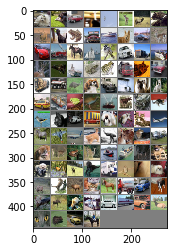

In [6]:
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
class CNN_classification(nn.Module):
    def __init__(self, batch_size):
        super(CNN_classification, self).__init__()
        
        self.batch_size = batch_size
        
        self.conv_module = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc_module = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10),
            nn.ReLU()
        )
    
    def forward(self, x):
        out = self.conv_module(x)
        out = out.view(self.batch_size, -1)
        out = self.fc_module(out)
        
        return torF.softmax(out, dim = 1)
    
CNN = CNN_classification(batch_size).to(cal_dev)

In [8]:
criterion = nn.CrossEntropyLoss()

learning_rate = 3e-3
optimizer = optim.Adam(CNN.parameters(), lr=learning_rate)
#optimizer = optim.SGD(CNN.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 50
num_batches = len(train_dataloader)

In [ ]:

trn_loss_list = []
val_loss_list = []

for epoch in range(num_epochs):  # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # 입력을 받은 후,
        inputs, labels = data
       
        # Variable로 감싸고
        inputs, labels = inputs.to(cal_dev), labels.to(cal_dev)
        #x, labels = Variable(x.float().cuda()), Variable(labels.float().cuda())
        
        # 변화도 매개변수를 0으로 만든 후
        optimizer.zero_grad()

        # 학습 + 역전파 + 최적화
        outputs = CNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        

        # 통계 출력
        running_loss += loss.item() # [0]
        if (i+1) % 100 == 0:    # print every 2000 mini-batches
            with torch.no_grad(): # very very very very important!!!
                val_loss = 0.0
                for j, val in enumerate(test_dataloader):
                    val_x, val_label = val
                    
                    val_x = val_x.to(cal_dev)
                    val_label =val_label.to(cal_dev)

                    val_output = CNN(val_x)
                    v_loss = criterion(val_output, val_label)
                    val_loss += v_loss
                    
            print('[%d, %5d] loss: %.3f ' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
        
        # 학습용 이미지를 무작위로 가져오기
        # 이미지 보여주기
        #imshow(torchvision.utils.make_grid(x))
        # 정답(label) 출력
        #print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
        
print('Finished Training')

[1,   100] loss: 2.231 
[1,   200] loss: 2.179 
[1,   300] loss: 2.161 
[1,   400] loss: 2.124 
[1,   500] loss: 2.123 
[2,   100] loss: 2.119 
[2,   200] loss: 2.103 
[2,   300] loss: 2.096 
[2,   400] loss: 2.080 
[2,   500] loss: 2.091 
[3,   100] loss: 2.086 
[3,   200] loss: 2.087 
[3,   300] loss: 2.090 
[3,   400] loss: 2.082 
[3,   500] loss: 2.073 
[4,   100] loss: 2.078 
[4,   200] loss: 2.078 
[4,   300] loss: 2.076 
[4,   400] loss: 2.064 
[4,   500] loss: 2.087 
[5,   100] loss: 2.065 
[5,   200] loss: 2.079 
[5,   300] loss: 2.068 
[5,   400] loss: 2.066 
[5,   500] loss: 2.070 
[6,   100] loss: 2.069 
[6,   200] loss: 2.051 
[6,   300] loss: 2.075 
[6,   400] loss: 2.069 
[6,   500] loss: 2.073 
[7,   100] loss: 2.074 
[7,   200] loss: 2.069 
[7,   300] loss: 2.068 
[7,   400] loss: 2.080 
[7,   500] loss: 2.085 
[8,   100] loss: 2.080 
[8,   200] loss: 2.097 
[8,   300] loss: 2.111 
[8,   400] loss: 2.099 
[8,   500] loss: 2.097 
[9,   100] loss: 2.098 
[9,   200] loss: